In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/MyDrive/PJ/csv/tipos/Carambola.csv')

Mounted at /content/drive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cliente         2080 non-null   object 
 1   precio_venta    2058 non-null   float64
 2   peso            2080 non-null   float64
 3   t_id            2080 non-null   object 
 4   fecha_venta     2074 non-null   object 
 5   hora_venta      2074 non-null   object 
 6   tipo            2080 non-null   object 
 7   fecha_recogida  2080 non-null   object 
 8   hora_recogida   2080 non-null   object 
 9   lote            2080 non-null   object 
 10  marca           2080 non-null   object 
 11  coste_inicial   2023 non-null   float64
 12  proveedor       2080 non-null   object 
dtypes: float64(3), object(10)
memory usage: 211.4+ KB


In [ ]:
print(df.describe())

       precio_venta         peso  coste_inicial
count   2058.000000  2080.000000    2023.000000
mean       3.482882   298.956831       1.993133
std        0.709310   101.032885       0.498643
min        0.955894   -64.136598       0.022064
25%        3.017644   231.324452       1.658255
50%        3.491888   299.696490       1.991036
75%        3.979488   368.168463       2.322992
max        5.673450   620.211558       3.594309


In [ ]:
print(df.head())

         cliente  precio_venta        peso                  t_id fecha_venta  \
0  CompraMaestra      3.507565  259.097993  Carambola 001015.png  2022/09/16   
1  CompraMaestra      4.352168  333.660658  Carambola 001078.png  2022/09/08   
2  CompraMaestra      2.977798  408.849008  Carambola 001095.png  2022/09/09   
3  CompraMaestra      4.142619  116.614077  Carambola 001114.png  2022/09/16   
4  CompraMaestra      4.546924  202.722141  Carambola 001119.png  2022/09/09   

  hora_venta       tipo fecha_recogida hora_recogida  \
0      17:00  Carambola     2022/09/16         07:00   
1      11:00  Carambola     2022/09/08         04:00   
2      15:00  Carambola     2022/09/09         09:00   
3      09:00  Carambola     2022/09/16         00:00   
4      14:00  Carambola     2022/09/09         07:00   

                           lote              marca  coste_inicial  \
0  I65B65S66U76G48L49L49Q46V78M  AromasCelestiales       1.830236   
1  I65B65S66U76G48L49L55T46V78M     Aventura

In [ ]:
df['coste_inicial'] = df['coste_inicial'].round(2)
df['peso'] = df['peso'].round(2)
df['precio_venta'] = df['precio_venta'].round(2)

df.head()

# **PESO**

Empezamos analizando los PESOS

In [ ]:
peso_minimo = df["peso"].min()
peso_maximo = df["peso"].max()
negativos = df[df["peso"] < 0]
nulos = df[df["peso"].isnull()]

print(f"Peso mínimo: {peso_minimo}")
print(f"Peso máximo: {peso_maximo}")
print(f"Total negativos: {len(negativos)}")
print(f"Total nulos: {len(nulos)}")

Peso mínimo: -64.13659792638197
Peso máximo: 620.2115578815464
Total negativos: 5
Total nulos: 0


In [ ]:
df[df["peso"] < 0]["marca"].value_counts()


,count
marca,
ExquisitoJardín,1
FrutaDulce,1
GourmetFrutas,1
FrescoDelValle,1
FiestaSabor,1


In [ ]:
df[df["peso"] < 0]["proveedor"].value_counts()

,count
proveedor,
Cultivos Hidropónicos Innovagro,1
Tecnosembradoras del Sur,1
AgroSuministros del Campo,1
Carnes Sostenibles CampoReal,1
Fertilizantes Naturales del Valle,1


In [ ]:
df[df["peso"] < 0]["lote"].unique()

array(['I65B65S66U76G48L49O50R46V78M', 'I65B65S66U76G48L50L52Q46V78M',
       'I65B65S66U76G48L49R52N46V78M', 'I65B65S66U76G48L49P49N46V78M',
       'I65B65S66U76G48L51U51J80T71'], dtype=object)

Revisamos si es una marca o proveedor en específico que tiene negativos pero resultan ser los lotes I65B65S66U76G48L.

In [ ]:
print(negativos["peso"])

661    -18.669020
754    -10.880105
1352   -64.136598
1539    -0.764293
1747    -6.771733
Name: peso, dtype: float64


Para la poca cantidad que son los eliminamos, no tienen sentido tampoco en positivo.

In [ ]:
filas_peso_negativo = df[df["peso"] < 0]
print(filas_peso_negativo)

                         cliente  precio_venta       peso  \
661            La Ruta del Sabor      3.364784 -18.669020   
754              La Gran Cosecha      3.628341 -10.880105   
1352           SuperOfertas Plus           NaN -64.136598   
1539          Delicias del Campo      3.087737  -0.764293   
1747  Central de Abastos Central      3.310534  -6.771733   

                      t_id fecha_venta hora_venta       tipo fecha_recogida  \
661   Carambola 001326.png  2022/09/08      12:00  Carambola     2022/09/08   
754   Carambola 002045.png  2022/09/23      20:00  Carambola     2022/09/23   
1352  Carambola 001642.png  2022/09/13      06:00  Carambola     2022/09/12   
1539  Carambola 001412.png  2022/09/12      05:00  Carambola     2022/09/11   
1747   Carambola 00393.png  2022/09/20      14:00  Carambola     2022/09/20   

     hora_recogida                          lote            marca  \
661          06:00  I65B65S66U76G48L49O50R46V78M  ExquisitoJardín   
754          10:00  

Reemplazamos todos los valores negativos por NaN


In [ ]:
df["peso"] = df["peso"].mask(df["peso"] < 0)

In [ ]:
print("Cantidad de pesos mayores de 200 g:", len(df[df['peso'] > 200]))
print("Peso máximo:", df.loc[df['peso'] > 200, 'peso'].max())

Cantidad de pesos mayores de 200 g: 1757
Peso máximo: 620.2115578815464


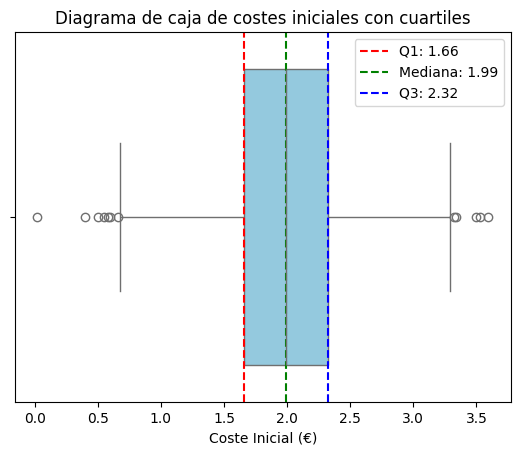

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["coste_inicial"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de costes iniciales con cuartiles')
plt.xlabel('Coste Inicial (€)')
plt.legend()

plt.show()

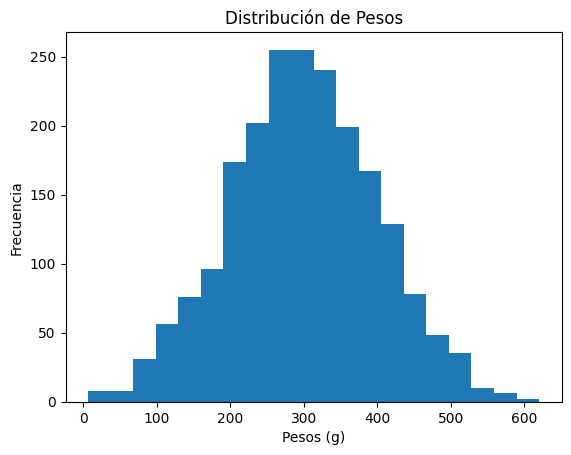

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["peso"].dropna(), bins=20)
plt.title('Distribución de Pesos')
plt.xlabel('Pesos (g)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_pe = df["peso"].quantile(0.25)
Q3_pe = df["peso"].quantile(0.75)
IQR_pe = Q3_pe - Q1_pe
outliers_pe = df[df["peso"] > Q3_pe + 1.5 * IQR_pe]

print("Total outliers:", outliers_pe["peso"].count())
print(Q1_pe)
print(Q3_pe)
print(IQR_pe)

Total outliers: 6
231.73278097482665
368.22850252429834
136.49572154947168


In [ ]:
print(df[['peso', 't_id']].dropna(subset=['peso']).sort_values(by='peso'))

            peso                  t_id
839     6.730326   Carambola 00992.png
836    19.634056   Carambola 00877.png
1276   23.120947  Carambola 001630.png
46     23.432647   Carambola 00939.png
320    24.033494  Carambola 001925.png
...          ...                   ...
1192  577.431983   Carambola 00836.png
88    578.330601   Carambola 00419.png
581   586.227966   Carambola 00552.png
789   597.179022  Carambola 001139.png
176   620.211558  Carambola 001376.png

[2075 rows x 2 columns]


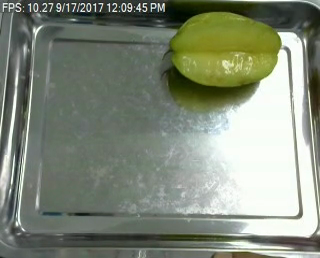

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Carambola/Carambola 00419.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

Aqui vemos una sola carambola y un peso de 578.330601gr.

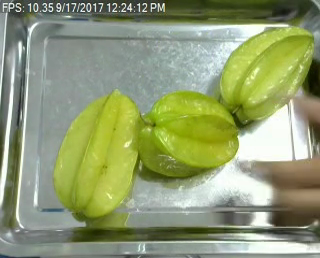

In [ ]:
from IPython.display import Image, display

image_path = '/content/drive/MyDrive/PJ/archive/Carambola/Carambola 00992.png'

try:
    display(Image(filename=image_path))
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta {image_path}. Por favor, verifica la ruta de tu imagen.")
except Exception as e:
    print(f"Ocurrió un error al cargar la imagen: {e}")

En esta imagen vemos tres carambolas y un peso de 6.730326 gr.
Buscamos información y el peso medio de una carambola ronda entre 90 y 150 gramos. Por lo que tres carambolas no pueden pesar tan poco.


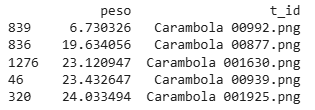

todas las imagenes anteriores muestran pesos excesivamente bajos para el peso de una carambola y además todas las imagenes muestran minimo 3 carambolas por imagen.

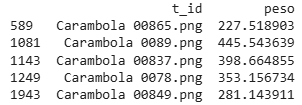

En cambio en todas estas imagenes solamente aparece una carambola y los pesos son muy superiores a las anteriores.

Dejo los pesos aquí y veremos más adelante. Empiezo con coste inicial.


# **COSTE INICIAL**

In [ ]:
coste_inicial_min = df["coste_inicial"].min()
coste_inicial_max = df["coste_inicial"].max()
negativos_coste = df[df["coste_inicial"] < 0]
nulos_coste = df[df["coste_inicial"].isnull()]

print(f"Coste inicial mínimo: {coste_inicial_min}")
print(f"Coste inicial máximo: {coste_inicial_max}")
print(f"Coste inicial negativos: {len(negativos_coste)}")
print(f"Coste inicial nulos: {len(nulos_coste)}")

Coste inicial mínimo: 0.0220638302489888
Coste inicial máximo: 3.594309374156345
Coste inicial negativos: 0
Coste inicial nulos: 57


No encontramos negativos y los costes iniciales van desde los 0.02 hasta los 3.59


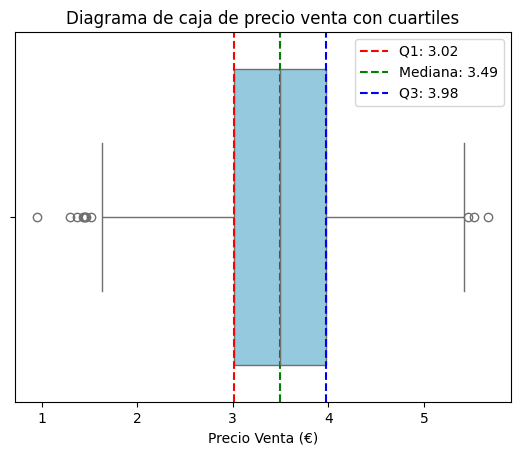

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["precio_venta"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de precio venta con cuartiles')
plt.xlabel('Precio Venta (€)')
plt.legend()

plt.show()

En el gráfico se ven muchos outliers. Vamos a ver en otro gráfico como visualizamos los datos.

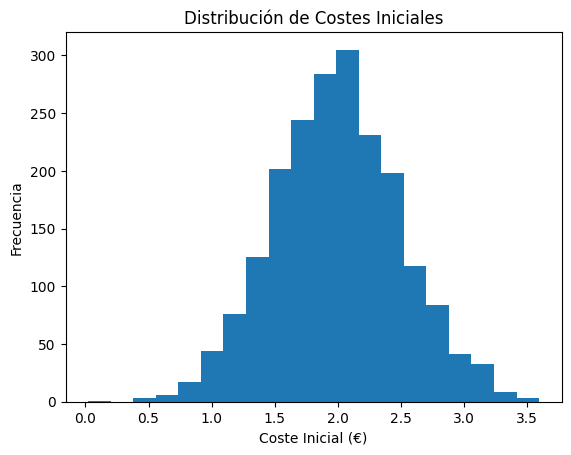

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["coste_inicial"].dropna(), bins=20)
plt.title('Distribución de Costes Iniciales')
plt.xlabel('Coste Inicial (€)')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
Q1_ci = df["coste_inicial"].quantile(0.25)
Q3_ci = df["coste_inicial"].quantile(0.75)
IQR_ci = Q3_ci - Q1_ci
outliers_ci = df[df["coste_inicial"] > Q3_ci + 1.5 * IQR_ci]

print("Total outliers:", outliers_ci["coste_inicial"].count())
print(Q1_ci)
print(Q3_ci)
print(IQR_ci)

Total outliers: 5
1.65825478507168
2.3229922177724767
0.6647374327007967


Una vez analizados los costes iniciales y viendo que tenemos 5 outliers y el resto de costes se mueven en la media deben de ser excepciones por algún motivo de calidad, tamaño o imperfecciones de la fruta.

Pasamos a analizar los precios de venta:

# **PRECIO VENTA**

In [ ]:
peso_minimo_pv = df["precio_venta"].min()
peso_maximo_pv = df["precio_venta"].max()
negativos_pv = df[df["precio_venta"] < 0]
nulos_pv = df[df["precio_venta"].isnull()]

print(f"Precio venta mínimo: {peso_minimo_pv}")
print(f"Precio venta máximo: {peso_maximo_pv}")
print(f"Total negativos: {len(negativos_pv)}")
print(f"Total nulos: {len(nulos_pv)}")

Precio venta mínimo: 0.9558938290756438
Precio venta máximo: 5.67344951917598
Total negativos: 0
Total nulos: 22


Sabemos que las frutas que no tienen datos de venta es fruta que no ha podido ser vendida porque ha sido dañada durante la distribución. Vamos a comprobar si tienen fecha de venta.

In [ ]:
display(nulos_pv[nulos_pv["fecha_venta"].isnull()])

,cliente,precio_venta,peso,t_id,fecha_venta,hora_venta,tipo,fecha_recogida,hora_recogida,lote,marca,coste_inicial,proveedor


Ningún nulo es un producto dañado y no ha sido vendido. Por lo tanto la empresa ha sufrido una perdida de información o esta información no ha sido registrada correctamente.

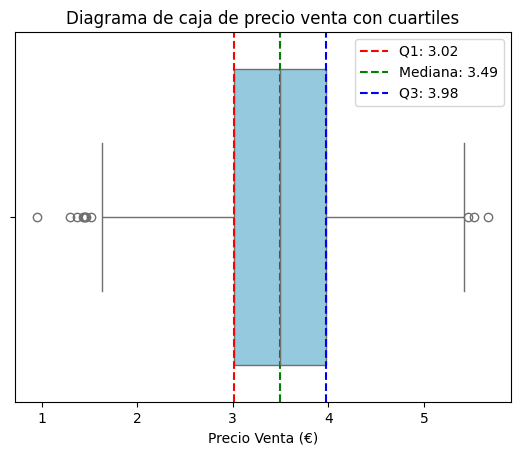

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

costes = df["precio_venta"].dropna()


q1 = costes.quantile(0.25)
q2 = costes.quantile(0.50)
q3 = costes.quantile(0.75)

sns.boxplot(x=costes, orient='h', color='skyblue')

plt.axvline(q1, color='red', linestyle='--', label=f'Q1: {q1:.2f}')
plt.axvline(q2, color='green', linestyle='--', label=f'Mediana: {q2:.2f}')
plt.axvline(q3, color='blue', linestyle='--', label=f'Q3: {q3:.2f}')

plt.title('Diagrama de caja de precio venta con cuartiles')
plt.xlabel('Precio Venta (€)')
plt.legend()

plt.show()

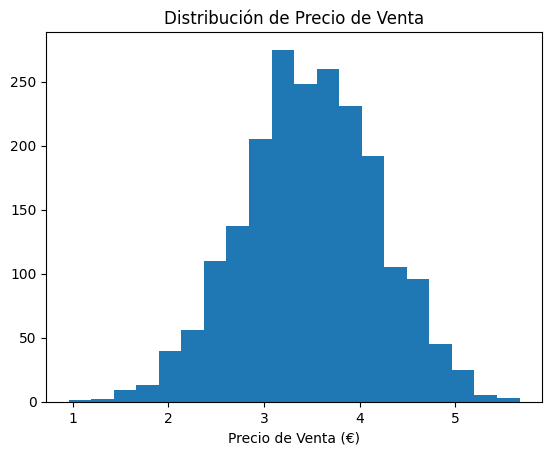

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["precio_venta"].dropna(), bins=20)
plt.title('Distribución de Precio de Venta')
plt.xlabel('Precio de Venta (€)')
plt.ylabel('')
plt.show()

In [ ]:
Q1_pv = df["precio_venta"].quantile(0.25)
Q3_pv = df["precio_venta"].quantile(0.75)
IQR_pv = Q3_pv - Q1_pv
outliers_pv = df[df["precio_venta"] > Q3_pv + 1.5 * IQR_pv]

print("Total outliers:", outliers_pv["precio_venta"].count())
print(Q1_pv)
print(Q3_pv)
print(IQR_pv)

Total outliers: 3
3.0176441306525703
3.9794884847095484
0.9618443540569781


En precio venta tenemos 3 outliers mientras que en coste inicial teníamos 5.

In [ ]:
outliers_pv_ci = pd.merge(outliers_ci, outliers_pv, on='t_id', how='inner')
outliers_pv_ci

,cliente_x,precio_venta_x,peso_x,t_id,fecha_venta_x,hora_venta_x,tipo_x,fecha_recogida_x,hora_recogida_x,lote_x,...,peso_y,fecha_venta_y,hora_venta_y,tipo_y,fecha_recogida_y,hora_recogida_y,lote_y,marca_y,coste_inicial_y,proveedor_y


No coinciden.

Vamos a comprobar la norma que tenemos que cumplir que desde día de recogida hasta fecha venta tiene que pasar al menos un día.

In [ ]:
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], errors='coerce')
df['fecha_recogida'] = pd.to_datetime(df['fecha_recogida'], errors='coerce')

tiempo_diferencia = df['fecha_venta'] - df['fecha_recogida']

al_menos_un_dia = (tiempo_diferencia >= pd.Timedelta(days=1)).all()

print(f"Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? {al_menos_un_dia}")

Es verdad que desde fecha_recogida y fecha_venta pasa al menos un día? False


In [ ]:
tiempo_diferencia.min()

Timedelta('-22 days +00:00:00')

In [ ]:
tiempo_diferencia.sort_values()

,0
1886,-22 days
993,-20 days
1882,-15 days
478,-15 days
965,-14 days
...,...
597,NaT
669,NaT
1602,NaT
1854,NaT


Nos encontramos con datos negativos.
Sabemos que no se pueden realizar reservas antes de la recogida por lo que es un error y la norma no se cumple.

**No en todos los productos pasan 24 horas mínimo desde la recogida hasta la venta.**

El peso está en gramos. Vamos a comprobar si a cada proveedor no se le venden más de 100Kg de fruta en un solo día.

In [ ]:
venta_dia = df.groupby(['proveedor', 'fecha_venta'])['peso'].sum()

mayor_100kg = (venta_dia > 100000).any()

print(f"¿Algún proveedor recibe más de 100 kg en un solo día? {mayor_100kg}")

¿Algún proveedor recibe más de 100 kg en un solo día? False


No se le vende más de 100Kg de carambolas a un proveedor en un solo día.

**En el caso de las carambolas esta norma se cumple.**

Vamos a comprobar que 1 lote solo contiene un tipo de fruta y de una sola marca.

In [ ]:
lote_check = df.groupby('lote').agg({
    'tipo': 'nunique',
    'marca': 'nunique'
}).reset_index()

tipo_check = lote_check[lote_check['tipo'] > 1]
marca_check = lote_check[lote_check['marca'] > 1]

if tipo_check.empty and marca_check.empty:
    print("Cada lote solo contiene un tipo de fruta o una marca.")
else:
    print("Norma incumplida:")
    if not tipo_check.empty:
        print("\nLotes con más de un tipo de fruta:")
        display(tipo_check)
    if not marca_check.empty:
        print("\nLotes con más de una marca:")
        display(marca_check)

Cada lote solo contiene un tipo de fruta o una marca.


En un solo lote con las Carambolas no encontramos más de un tipo de fruta ni más de una marca.

**Esta norma se cumple con las carambolas.**

In [ ]:
df = df.dropna(subset=['coste_inicial', 'precio_venta'])
df = df[df['coste_inicial'] != 0]
df['rentabilidad'] = ((df['precio_venta'] - df['coste_inicial']) / df['coste_inicial']) * 100

df_lote = df.groupby('lote', as_index=False)[['coste_inicial', 'precio_venta', 'rentabilidad']].mean()

corr = df_lote[['coste_inicial', 'precio_venta', 'rentabilidad']].corr()
display(corr)

,coste_inicial,precio_venta,rentabilidad
coste_inicial,1.000000,0.699826,-0.192201
precio_venta,0.699826,1.000000,-0.027193
rentabilidad,-0.192201,-0.027193,1.000000


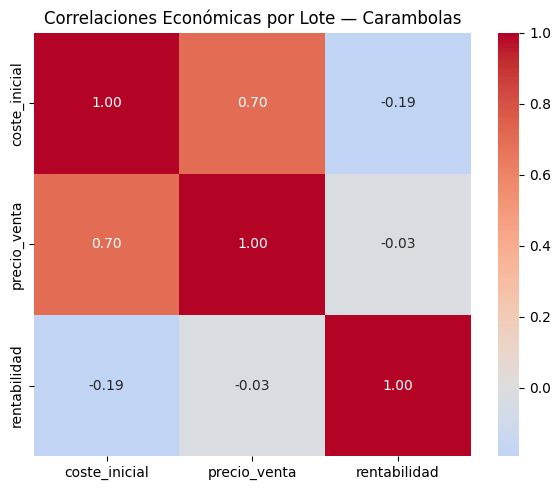

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Correlaciones Económicas por Lote — Carambolas')
plt.tight_layout()
plt.show()

               precio_venta  coste_inicial      peso
precio_venta       1.000000       0.699826 -0.008224
coste_inicial      0.699826       1.000000  0.014347
peso              -0.008224       0.014347  1.000000


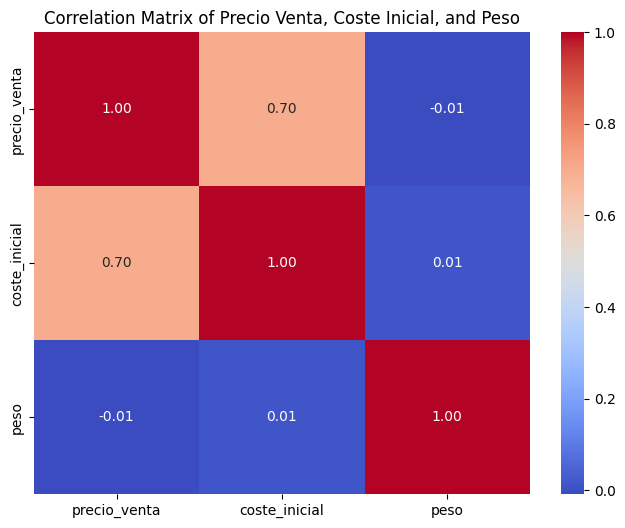

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['precio_venta', 'coste_inicial', 'peso']].corr()

print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Precio Venta, Coste Inicial, and Peso')
plt.show()

Las correlaciones entre coste inicial y precio venta son de 0.70 mientras que no encontramos correlación entre precio venta y peso ni entre coste inicial y peso. Creemos que esto debería estar totalmente relacionado ya que a mayor peso deberia tener un coste o precio mayor. Esto refuerza la teoria que exponemos de que los pesos no son correctos.

Aqui dejamos el analisis de las Carambolas y pasamos a analizar la siguiente fruta